In [ ]:
# PROGRAMMING FOR ANALYTICS - ASSIGNMENT 3

### In this assignment, we will be using the same file as the previous assigment "hotels.txt" which is still available on Canvas. 

### TASK 1: Import the required libraries and read the file into the Python Session and print.

#ENABLE PLOT FUNCTION
%matplotlib inline

#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

#import the file
ht = pd.read_csv("C:/Users/jhb_f/Desktop/Fall 2017 B/Programming/hotels_scrubbed.csv", encoding='latin-1', index_col=0)

#print data type
print(type(ht))

#print head
print(ht.head())

# change data types for categorical variables
ht[['hotel_code', 'location_code']] = ht[['hotel_code', 'location_code']].astype(str)
ht.dtypes

### TASK 2: Plot the Histogram for bubble_rating from the scrubbed Hotels.txt file. Change the number of bins and the orientation for the same. 

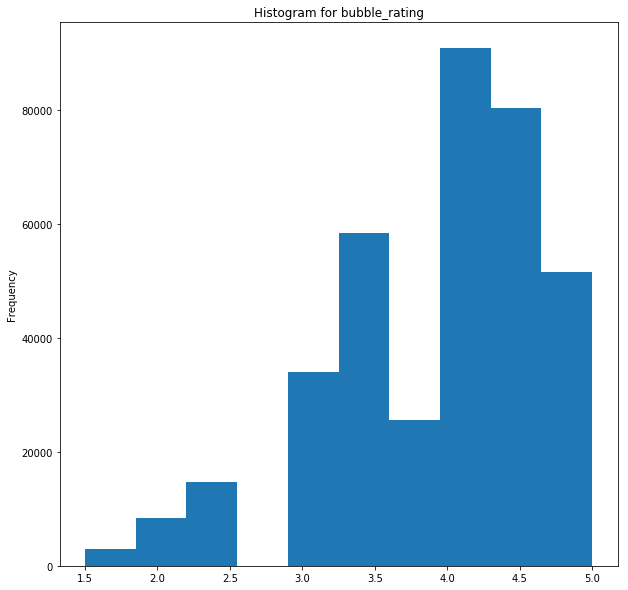

In [19]:
#plot the histogram
ht.bubble_rating.plot.hist()
plt.title('Histogram for bubble_rating')

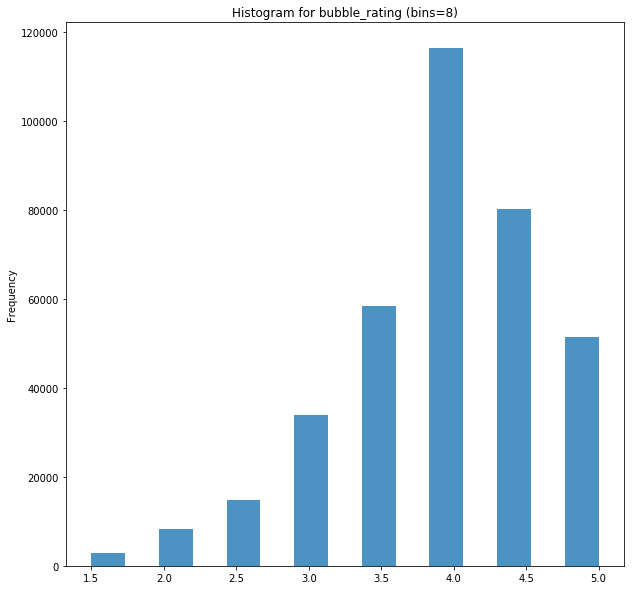

In [2]:
#change the number of bins
ht.bubble_rating.plot.hist(alpha=.8, bins=15)
plt.title('Histogram for bubble_rating (bins=8)')

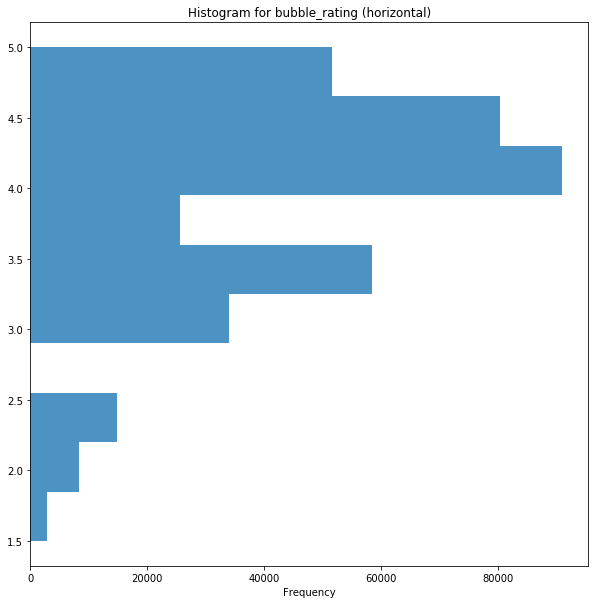

In [22]:
#change the orientation
ht.bubble_rating.plot.hist(alpha=.8, orientation='horizontal')
plt.title('Histogram for bubble_rating (horizontal)')

### TASK 3: 
### (a) Plot the Box Plot of the bubble_rating from the scrubbed Hotels.txt file. 
### (b) Change the orientation.
### (c) Plot the Box Plot for multiple variables on the same figure. 

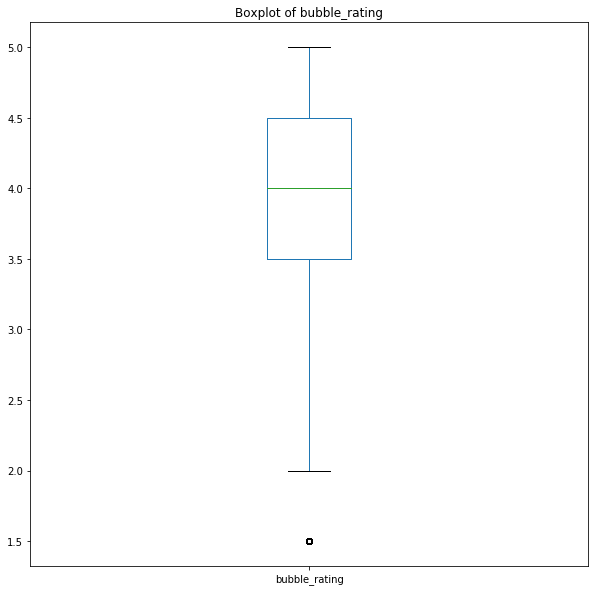

In [23]:
#plot the box plot for bubble_rating
ht.bubble_rating.plot.box()
plt.title('Boxplot of bubble_rating')

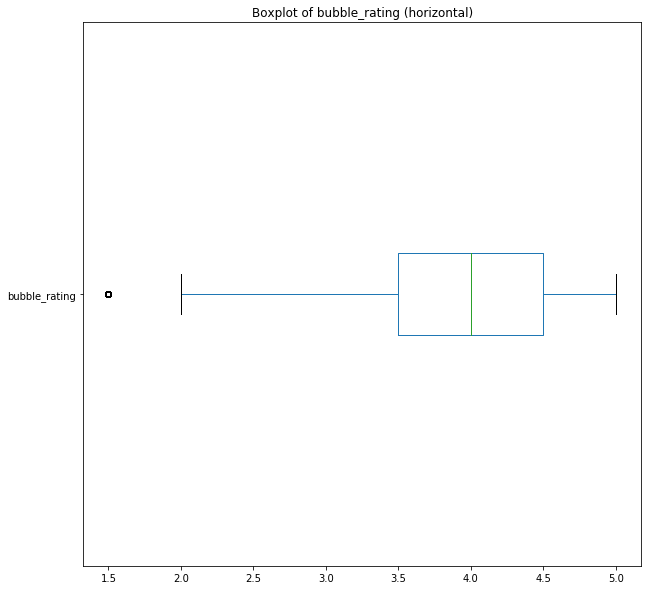

In [24]:
#change the orientation
ht.bubble_rating.plot.box(vert=False)
plt.title('Boxplot of bubble_rating (horizontal)')

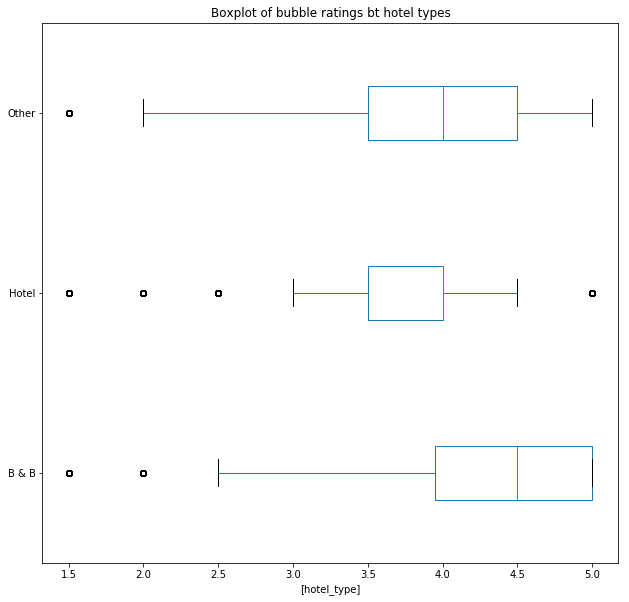

In [4]:
#boxplot for multiple variables 
ht.boxplot(column=['bubble_rating'], by=['hotel_type'], vert=False, grid=False)
plt.title('Boxplot of bubble ratings bt hotel types')
plt.suptitle("")

### TASK 4: Plot a Bar graph to compare a single numeric variable across a categorical variable. Use bubble_rating for the numeric variable and hotel_type for the categorical variable. 

##### NOTE: As we know, the file "Hotels.txt" has a lot of observations and the further graphs from it would take a lot of time to be plotted. In order to shorten the process, we would only consider the first 200 observations from the file "Hotels.txt" and save those observations into a new DataFrame. Make use of head() in this case. 

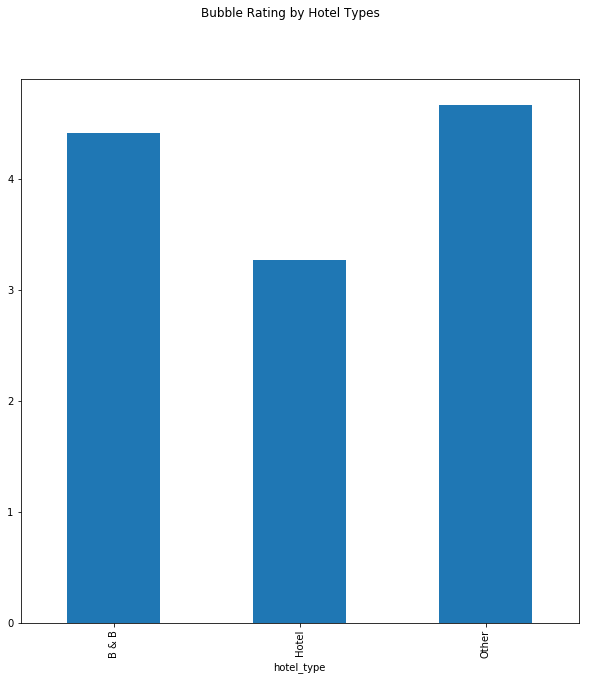

In [3]:
#choose variables and save first 200 observatoin to a new dataframe
ht200 = ht.head(200)

#plot the bar graph
ht200.groupby('hotel_type').bubble_rating.mean().plot.bar()
plt.suptitle("Bubble Rating by Hotel Types")

### Task 5: Calculate Mean Structure Metrics by hotel_type.

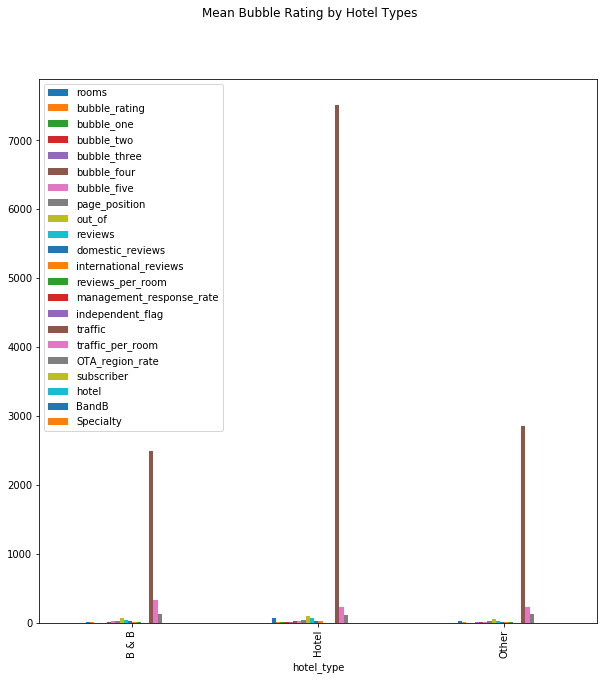

In [45]:
#select only numeric colunms
htsnum = ht.select_dtypes(exclude=['object'])

#append hotel_type to numeric dataframe
httype = ht['hotel_type']
htsnum1 = htsnum.join(httype)

#calculate the mean and plot the bar graph
htsnum1.groupby('hotel_type').mean().plot.bar()
plt.suptitle("Mean Bubble Rating by Hotel Types")

### Task 6: Plot a bubble graph using pairplot method for the numeric variables bubble_rating & traffic. Use hotel_type as hue.

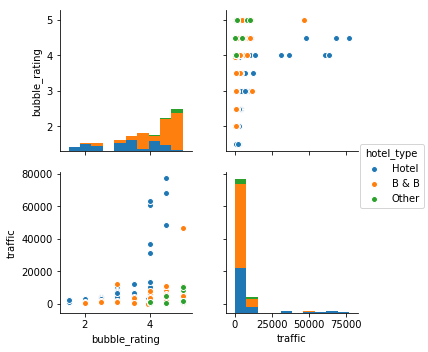

In [42]:
#import seaborn lib
import seaborn as sb

#plot the bubble graph
sb.pairplot(ht200,vars=['bubble_rating', 'traffic'], hue=('hotel_type'))

### Task 7: Plot the Treemap for mean bubble_rating by hotel_type.

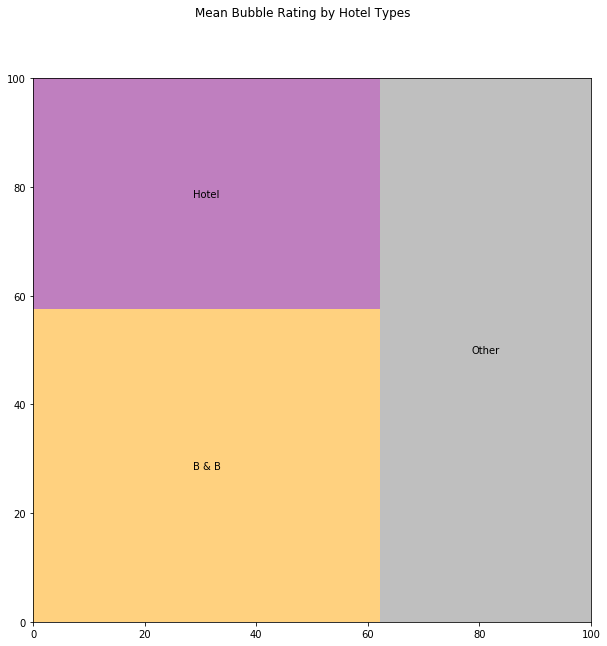

In [45]:
#import the squarify lib
import squarify as sq

# Convert a series to a dataframe
ht_200 = ht200.groupby('hotel_type').bubble_rating.mean().to_frame() 

# Convert the index to a new column
pd.DataFrame(ht_200).reset_index(inplace=True) 

#plot the treemap
sq.plot(sizes=ht_200['bubble_rating'], label=ht_200['hotel_type'], color=['Orange', 'purple', 'grey'], alpha=.5)
plt.suptitle("Mean Bubble Rating by Hotel Types")

### TASK 8: Plot the Line graph for trignometric tangent and logarithmic values of x.

In [28]:
#import numpy lib
import numpy as np

#get x
x = np.linspace(1, 10, 1000)

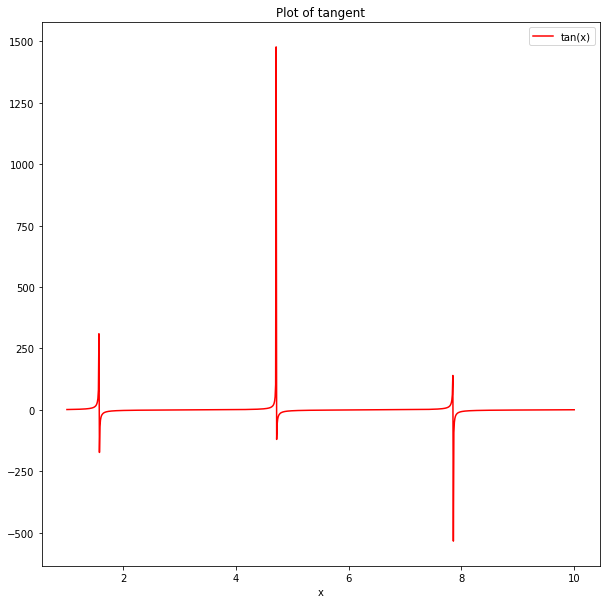

In [35]:
#plot graph for tangent
plt.plot(x, np.tan(x), color='red', label='tan(x)')
plt.xlabel("x")
plt.legend()
plt.title("Plot of tangent")

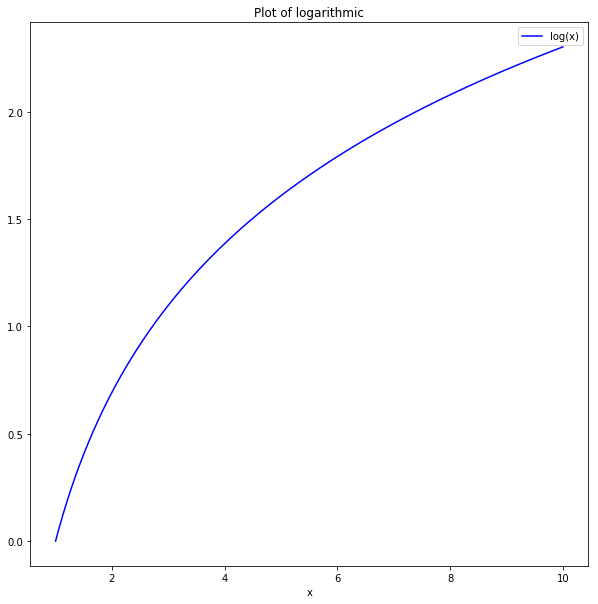

In [32]:
#plot for log
plt.plot(x, np.log(x), color='blue', label='log(x)')
plt.xlabel("x")
plt.legend()
plt.title("Plot of logarithmic")

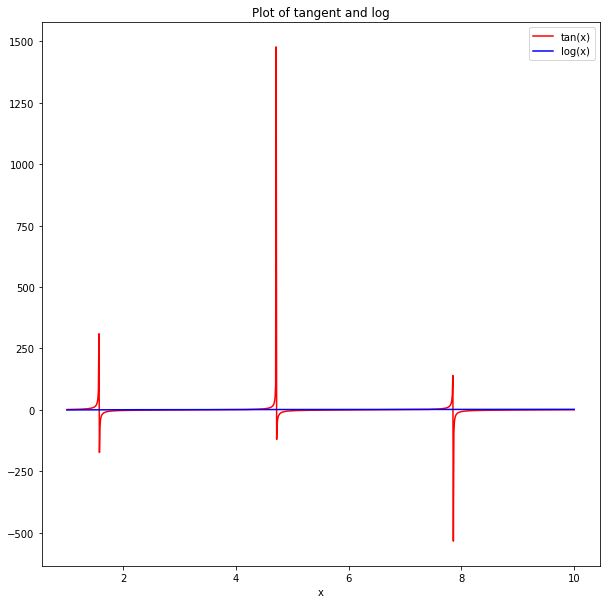

In [33]:
#plot graph for tangent and log on same figure
plt.plot(x, np.tan(x), color='red', label='tan(x)')
plt.plot(x, np.log(x), color='blue', label='log(x)')
plt.xlabel("x")
plt.legend()
plt.title("Plot of tangent and log")